# India Air Quality Data Analysis and Prediction

## <span style="color:red">PM2.5: A Key Indicator of Climate Change</span>
==============================================

### <span style="color:blue">Climate Change Impacts on PM2.5 Concentrations</span>

<span style="font-size: 1.2em">Climate change can affect the concentration and composition of PM2.5 in the atmosphere</span>, with studies indicating that:

* **Global population-weighted fine particle (PM2.5) concentrations have increased by 5%**: Simulations show that climate change has already affected air quality, leading to an increase in PM2.5 concentrations.
* **Near-surface ozone concentrations have increased by 2%**: Climate change has also led to an increase in ozone concentrations, exacerbating air quality issues.

### <span style="color:blue">Altering Dispersion of Primary Pollutants</span>

Research suggests that climate change could **alter the dispersion of primary pollutants**, particularly particulate matter, which can lead to changes in:

* **PM2.5 concentrations and composition**: Climate change can impact the makeup of PM2.5, leading to changes in air quality.

### <span style="color:blue">Trend Analysis in the United States</span>

A trend analysis over the last 30 years in the United States shows:

* **Minimal influences of weather changes on sulfate in the cold season**: Weather changes have had little impact on sulfate concentrations in the cold season.
* **Significant variations in weather impacts on other PM2.5 components**: Weather changes have had a significant impact on other PM2.5 components, such as sodium and silicon.

### <span style="color:blue">Climate Model Predictions</span>

Climate models predict that climate change will have a significant impact on **surface PM2.5 concentration**, with:

* **A model mean increase of 0.43 μg/m3 (− 0.25 to 1.71 μg/m3) globally**: Climate change is expected to lead to an increase in PM2.5 concentrations globally.
* **An increase in nine of ten world regions, with Africa being the exception**: Climate change will have a significant impact on PM2.5 concentrations in most regions, with Africa being the only exception.

### <span style="color:green">Conclusion</span>

PM2.5 is a key indicator of climate change, and understanding its relationship with climate change is crucial for addressing air quality issues.

### Importing Packages and Loading Data

In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
df = pd.read_csv('air-quality-india.csv',
                index_col = 0, parse_dates = True)
df.head()

,Year,Month,Day,Hour,PM2.5
Timestamp,,,,,
2017-11-07 12:00:00,2017,11,7,12,64.51
2017-11-07 13:00:00,2017,11,7,13,69.95
2017-11-07 14:00:00,2017,11,7,14,92.79
2017-11-07 15:00:00,2017,11,7,15,109.66
2017-11-07 16:00:00,2017,11,7,16,116.50


### Understanding Data

**Dataset Shape**

In [4]:
df.shape

(36192, 5)

**Checking for NULL Values**

In [5]:
df.isna().sum()

Year     0
Month    0
Day      0
Hour     0
PM2.5    0
dtype: int64

_The data has no NULL values._

**Minimum and Maximum Parameters**

In [6]:
df.index.min()

Timestamp('2017-11-07 12:00:00')

In [7]:
df.index.max()

Timestamp('2022-06-04 15:00:00')

_The dataset contains hourly PM2.5 values from 7th November 2017 12pm to 4th June 2022 3pm._

In [8]:
df.describe()

,Year,Month,Day,Hour,PM2.5
count,36192.000000,36192.000000,36192.000000,36192.000000,36192.000000
mean,2019.682278,6.331841,15.716401,11.477840,49.308429
std,1.345011,3.593321,8.859769,6.925088,24.863511
min,2017.000000,1.000000,1.000000,0.000000,7.020000
25%,2019.000000,3.000000,8.000000,5.000000,28.080000
50%,2020.000000,6.000000,16.000000,11.000000,45.730000
75%,2021.000000,10.000000,23.000000,17.000000,64.520000
max,2022.000000,12.000000,31.000000,23.000000,245.630000


**Minimum PM2.5 value**

In [9]:
print('PM2.5: {} at {}'.format(df['PM2.5'].min(), df['PM2.5'].idxmin()))

PM2.5: 7.02 at 2019-07-13 09:00:00


**Maximum PM2.5 value**

In [10]:
print('PM2.5: {} at {}'.format(df['PM2.5'].max(), df['PM2.5'].idxmax()))

PM2.5: 245.63 at 2018-11-07 21:00:00


#### Plotting the Data

**Overall Data**

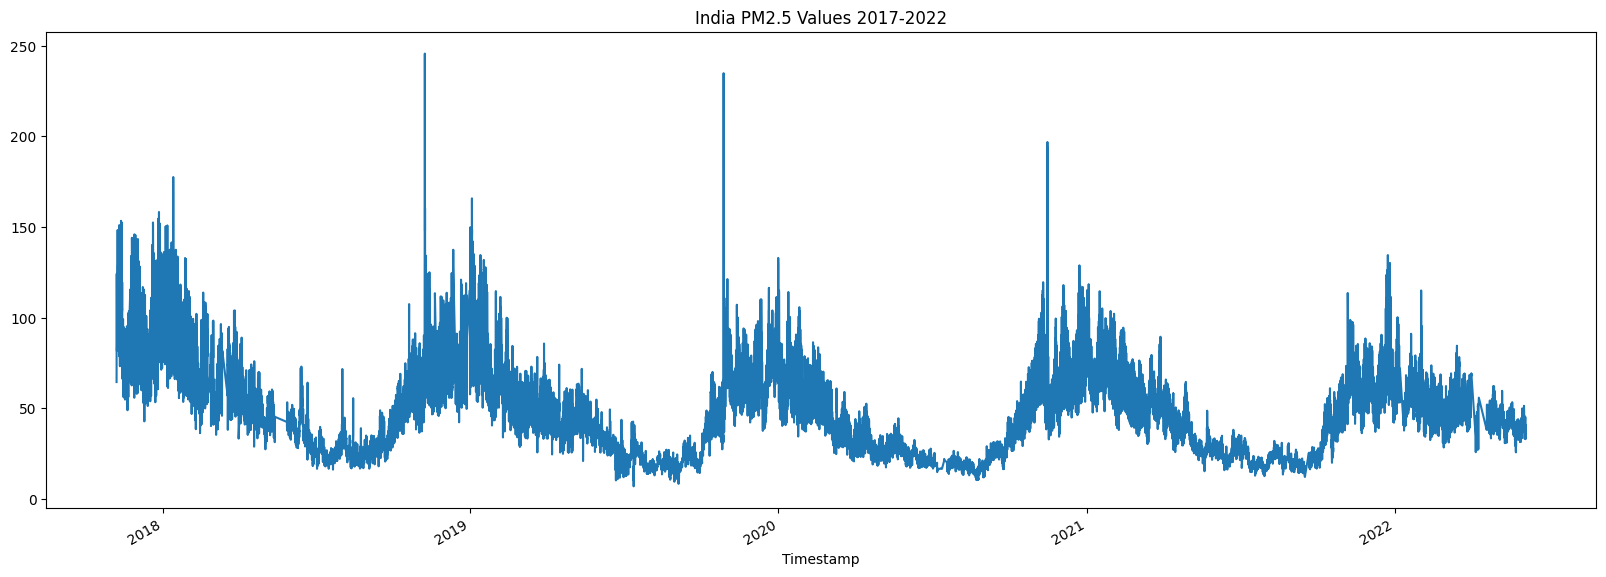

In [11]:
plt.figure(figsize = (20,7))
df['PM2.5'].plot(title = 'India PM2.5 Values 2017-2022')
plt.show()

___Inferences:___
 - From this graph we can confirm the seasonality of data. We will further assess this seasonality in later sections.
 - There is no obvious upward or downward trend that can be seen over the years in the values.
 - Certain unusually high spikes can be seen in almost each year. We will further investigate the details.

**Last 40hrs Hourly Data**

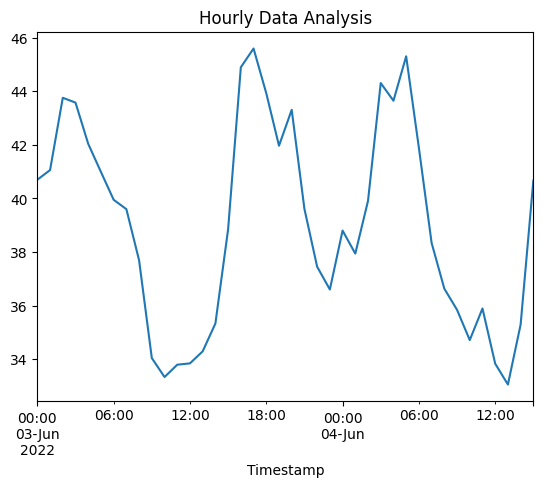

In [12]:
df[-40:]['PM2.5'].plot(title = 'Hourly Data Analysis')
plt.show()

**Summer vs Winter Hourly Data Analysis**

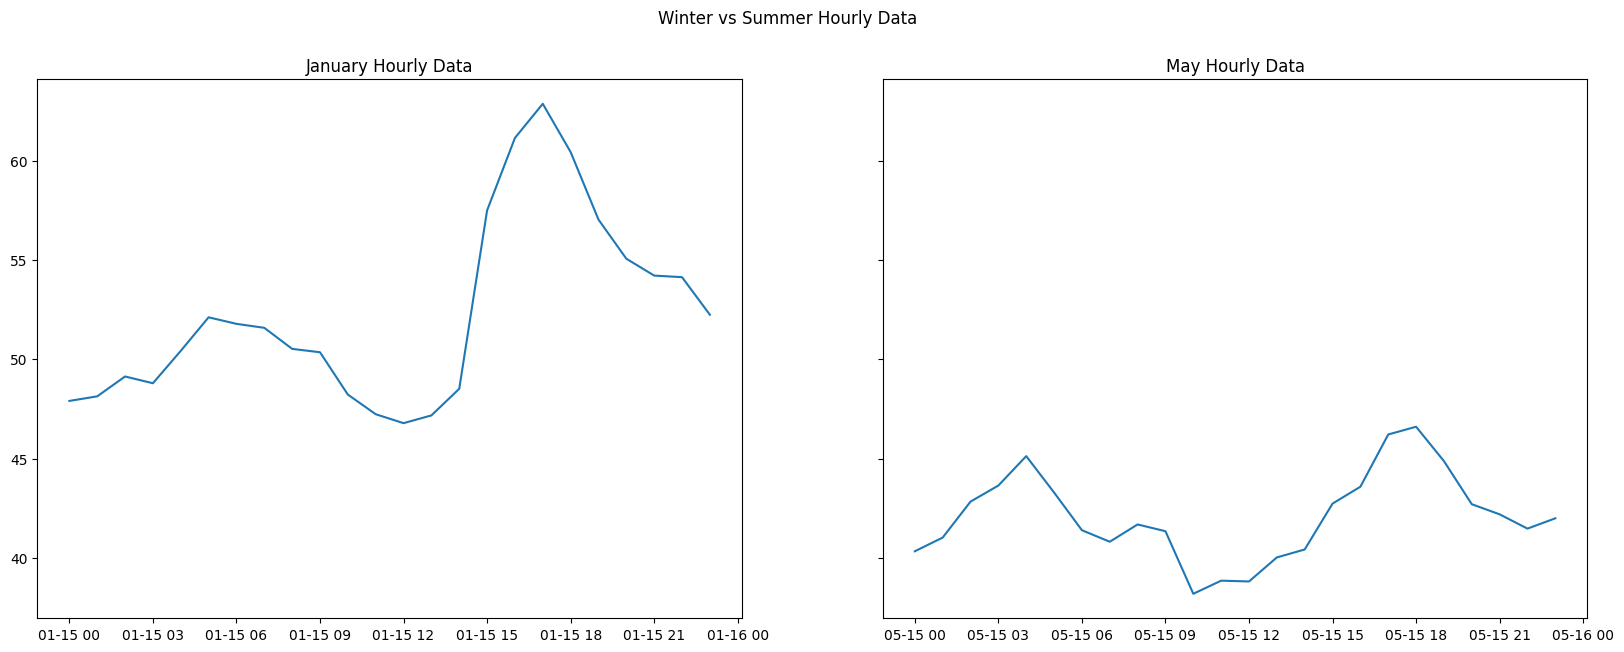

In [13]:
fig, ax = plt.subplots(1,2, sharey = True)
fig.set_figheight(7)
fig.set_figwidth(20)
ax[0].plot(df["2022-01-15":"2022-01-15"]['PM2.5'])
ax[1].plot(df["2022-05-15":"2022-05-15"]['PM2.5'])
ax[0].set_title('January Hourly Data')
ax[1].set_title('May Hourly Data')
fig.suptitle('Winter vs Summer Hourly Data')
plt.show()

___Inferences:___
 - We can see that the winter months (January) apparently have much higher PM2.5 values than summer months (May).
 - Though the common pattern between both that can be seen is that the PM2.5 values peak around 3 A.M. in the morning and drop at noon. Then again they increase till around 6 P.M. before dropping again.
 - This pattern seems common amongst all months irrespective of season.

## <span style="color:red">Traffic and Time of Day: Factors Affecting PM2.5 Concentrations</span>
============================================================

### <span style="color:blue">Traffic's Impact on PM2.5 Concentrations</span>

<span style="font-size: 1.2em">Traffic is a significant contributor to PM2.5 concentrations</span>, with:

* **Vehicle emissions**: Cars, trucks, and buses emit particulate matter, including PM2.5, into the atmosphere.
* **Road dust**: Tire wear and road surface degradation can also generate PM2.5 particles.

Studies have shown that:

* **High-traffic areas tend to have higher PM2.5 concentrations**: Areas with high traffic volumes, such as near highways or busy intersections, often have elevated PM2.5 levels.
* **Traffic congestion can increase PM2.5 concentrations**: Stop-and-go traffic and traffic jams can lead to increased emissions and higher PM2.5 concentrations.

### <span style="color:blue">Time of Day: A Factor in PM2.5 Concentrations</span>

The time of day can also impact PM2.5 concentrations, with:

* **Peak morning and evening rush hours**: PM2.5 concentrations often peak during morning and evening commutes, coinciding with increased traffic volumes.
* **Nighttime PM2.5 concentrations**: PM2.5 concentrations can decrease at night due to reduced traffic and industrial activities.

### <span style="color:blue">Interplay between Traffic and Time of Day</span>

The interplay between traffic and time of day can have a significant impact on PM2.5 concentrations, with:

* **Morning peak hours**: The combination of morning traffic and rush hour can lead to elevated PM2.5 concentrations.
* **Evening peak hours**: Similarly, the evening commute can also contribute to higher PM2.5 concentrations.

### <span style="color:green">Conclusion</span>

Both traffic and time of day are important factors to consider when understanding PM2.5 concentrations. By acknowledging these factors, we can better address air quality issues and develop targeted strategies to reduce PM2.5 concentrations.

## <span style="color:red">Impact of Seasons on PM2.5 Values in Indian Regions and Reasons</span>
===================================================================
In Indian regions, the impact of seasons on PM2.5 values is significant, with varying levels of pollution observed throughout the year. The reasons for this variation are attributed to climate change, which affects air quality in several ways.

### <span style="color:blue">Winter Months</span>

The highest concentration of PM2.5 in autumn and winter months is likely due to:

* Biomass burning
* Dispersion of pollutants due to the low boundary layer height

### <span style="color:blue">Summer Months</span>

In contrast, summer months have lower PM2.5 values, possibly due to:

* Increased atmospheric mixing
* Dispersion of pollutants

### <span style="color:blue">Meteorological Factors</span>

Climate change affects meteorological factors such as:

* Temperature
* Humidity
* Wind patterns

which in turn impact PM2.5 levels. For example, high temperatures and low humidity can increase the formation of ground-level ozone, a key component of PM2.5.

### <span style="color:blue">Urban Planning</span>

The impact of seasons on PM2.5 values varies in urban areas, where the influence of neighboring towns on pollution levels is particularly significant during colder months.

### <span style="color:green">Conclusion</span>

By understanding the impact of seasons on PM2.5 values in Indian regions, we can better address the root causes of climate change and develop effective strategies to mitigate its effects on air quality.

### Converting Hourly to Daily and Monthly Data

In [14]:
df_daily = df[['PM2.5']].resample('D').mean()
df_daily.head()

,PM2.5
Timestamp,
2017-11-07,99.805833
2017-11-08,110.979565
2017-11-09,114.915833
2017-11-10,119.404091
2017-11-11,109.267273


In [15]:
df_month = df_daily.resample('M').mean()
df_month.head()

,PM2.5
Timestamp,
2017-11-30,97.343549
2017-12-31,92.470023
2018-01-31,94.150763
2018-02-28,72.335703
2018-03-31,64.767914


**Dealing with NULL Values**

In [16]:
df_daily[df_daily['PM2.5'].isna()].head()

,PM2.5
Timestamp,
2018-02-24,NaN
2018-02-25,NaN
2018-03-13,NaN
2018-03-14,NaN
2018-03-15,NaN


In [17]:
for i in df_daily[df_daily['PM2.5'].isna()].index:
    print(df[i.date():i.date()])

Empty DataFrame
Columns: [Year, Month, Day, Hour, PM2.5]
Index: []
Empty DataFrame
Columns: [Year, Month, Day, Hour, PM2.5]
Index: []
Empty DataFrame
Columns: [Year, Month, Day, Hour, PM2.5]
Index: []
Empty DataFrame
Columns: [Year, Month, Day, Hour, PM2.5]
Index: []
Empty DataFrame
Columns: [Year, Month, Day, Hour, PM2.5]
Index: []
Empty DataFrame
Columns: [Year, Month, Day, Hour, PM2.5]
Index: []
Empty DataFrame
Columns: [Year, Month, Day, Hour, PM2.5]
Index: []
Empty DataFrame
Columns: [Year, Month, Day, Hour, PM2.5]
Index: []
Empty DataFrame
Columns: [Year, Month, Day, Hour, PM2.5]
Index: []
Empty DataFrame
Columns: [Year, Month, Day, Hour, PM2.5]
Index: []
Empty DataFrame
Columns: [Year, Month, Day, Hour, PM2.5]
Index: []
Empty DataFrame
Columns: [Year, Month, Day, Hour, PM2.5]
Index: []
Empty DataFrame
Columns: [Year, Month, Day, Hour, PM2.5]
Index: []
Empty DataFrame
Columns: [Year, Month, Day, Hour, PM2.5]
Index: []
Empty DataFrame
Columns: [Year, Month, Day, Hour, PM2.5]
Index

Since the values are not present for these days in the original dataset itself, hence we will interpolate the data.

In [18]:
df_daily.interpolate(limit_direction="both",inplace=True)

In [19]:
df_daily.isna().sum()

PM2.5    0
dtype: int64

In [20]:
df_month.isna().sum()

PM2.5    0
dtype: int64

### Plotting the Data

**Daily Air Quality Plot**

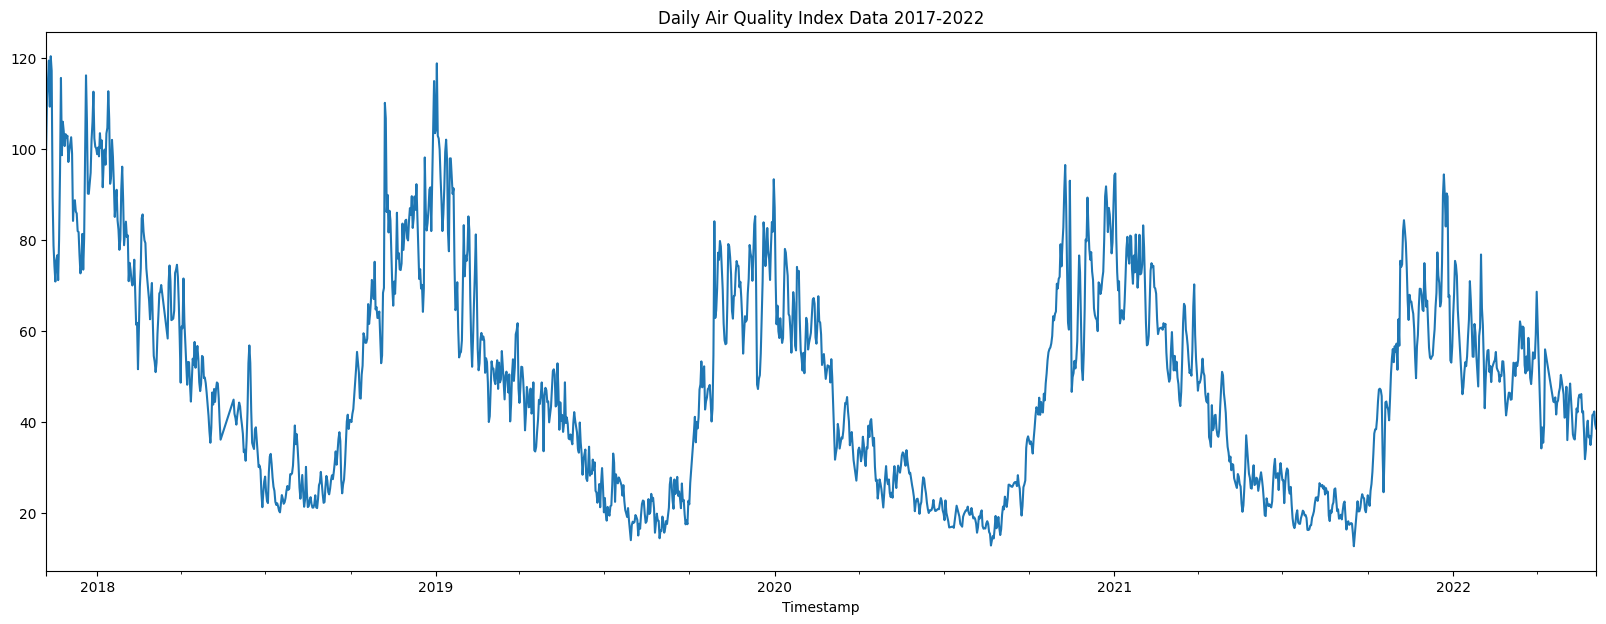

In [21]:
plt.figure(figsize = (20,7))
df_daily['PM2.5'].plot(title = 'Daily Air Quality Index Data 2017-2022')
plt.show()

**Monthly Air Quality Plot**

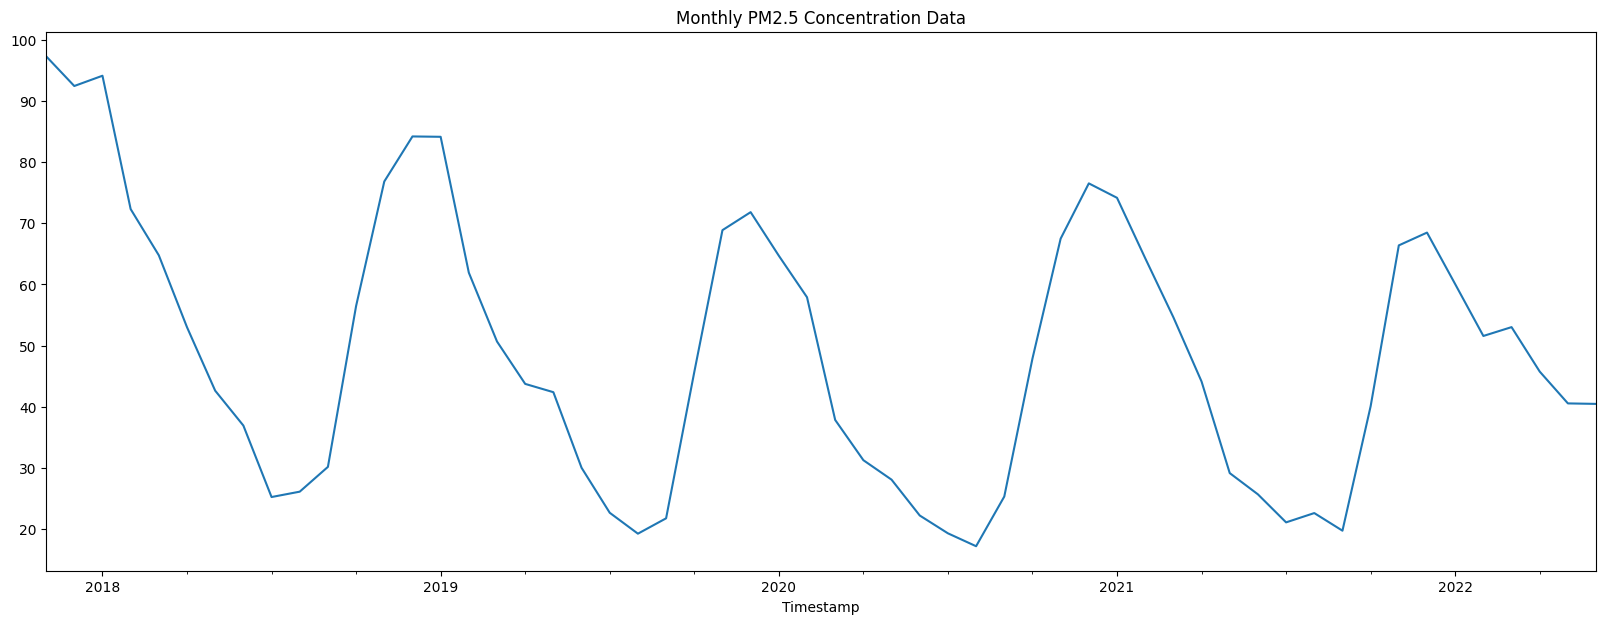

In [22]:
plt.figure(figsize = (20,7))
df_month['PM2.5'].plot(title = 'Monthly PM2.5 Concentration Data')
plt.show()

**Monthly view of Air Quality Data for 2021**

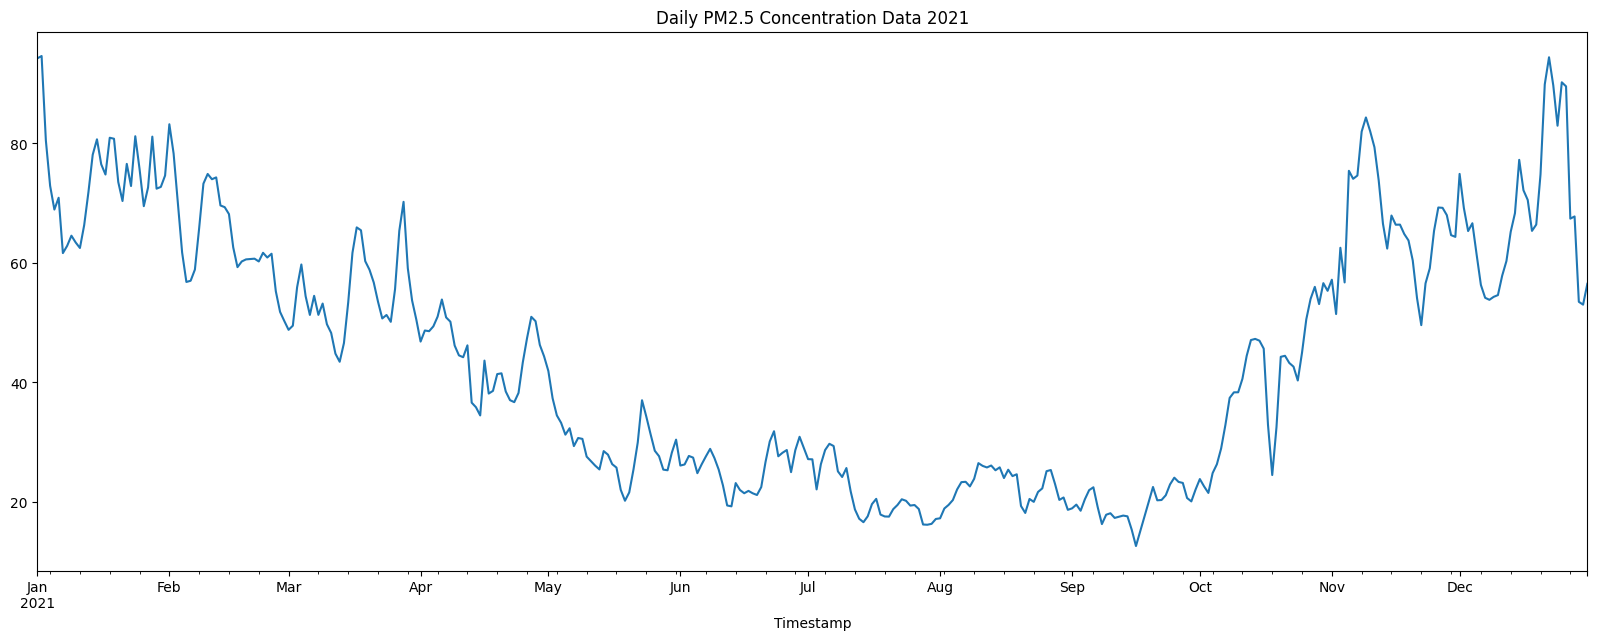

In [23]:
plt.figure(figsize = (20,7))
df_daily["2021":"2021"]['PM2.5'].plot(title = 'Daily PM2.5 Concentration Data 2021')
plt.show()

___Inferences:___
 - It can be seen that the winter months, as surmised before, have higher PM2.5 values than summer months.
 - Therefore, temperature can be seen to have a direct impact on air quality which can prove why climate change heavily affects the quality or air as well.

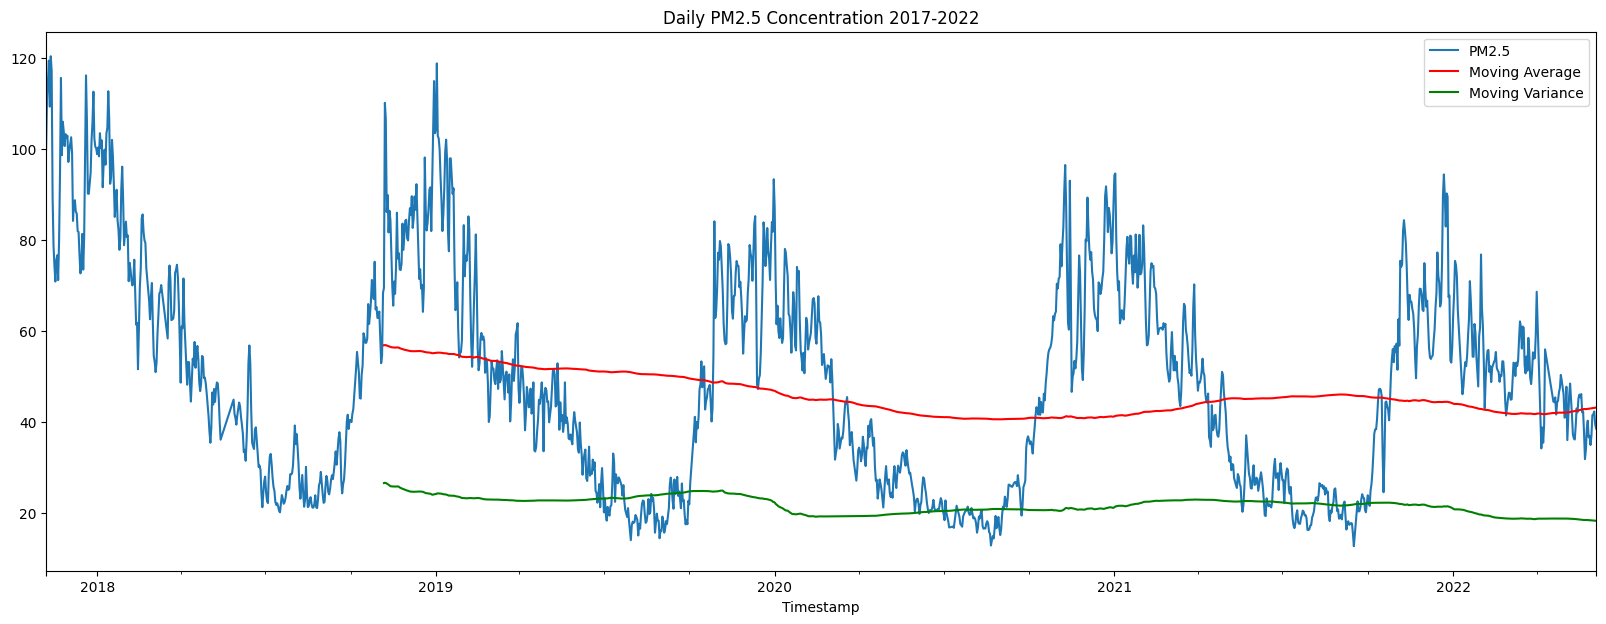

In [24]:
plt.figure(figsize = (20,7))
df_daily['PM2.5'].plot(title = 'Daily PM2.5 Concentration 2017-2022')
rolmean = df_daily.rolling(window=365).mean().set_index(df_daily.index)
plt.plot(rolmean.index, rolmean['PM2.5'], color='red', label='Moving Average')
rolstd = df_daily.rolling(window=365).std().set_index(df_daily.index)
plt.plot(rolstd.index, rolstd['PM2.5'], color='green', label='Moving Variance')
plt.legend()
plt.show()

___Inferences:___
 - The moving average and moving variance do not seem completely constant from the graph. Thus, the data may be non-stationary.
 - To confirm this, we will use the **Augmented Dickey-Fuller Test** to check if the data is stationary or not.

#### Augmented Dickey-Fuller Test
 - **H0**: The time series is not stationary.
 - **H1**: The time series is stationary.

In [25]:
from statsmodels.tsa.stattools import adfuller

In [26]:
result = adfuller(df_daily['PM2.5'])
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.3f' % result[1])

ADF Test Statistic: -2.87
5% Critical Value: -2.86
p-value: 0.049


___Inferences:___
 - In the above test, the p-value is less than 0.05.
 - Therefore, our null hypothesis is rejected as p-value is significant.
 - The given time series is **stationary**.
 - Therefore, it can be appropriately used for predictive modelling.

#### Seasonality Analysis

Prior to transforming the data, we will also conduct a seasonlity analysis on the data to check for trends, seasonality and residues.

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

**Using Daily Data**

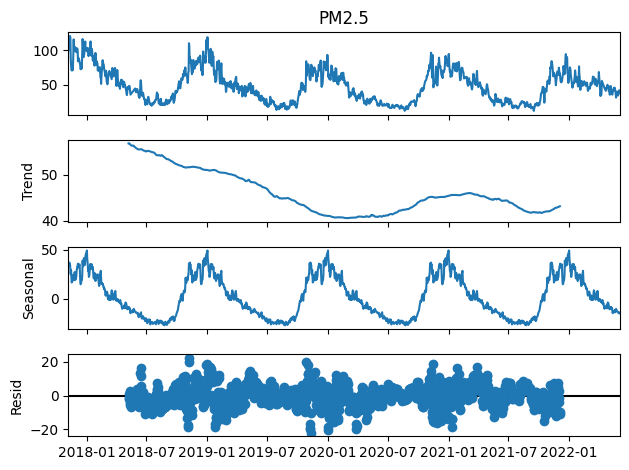

In [28]:
seasonal_analysis = seasonal_decompose(df_daily['PM2.5'], model = 'additive', period = 365)
seasonal_analysis.plot()
plt.show()

**Using Monthly Data**

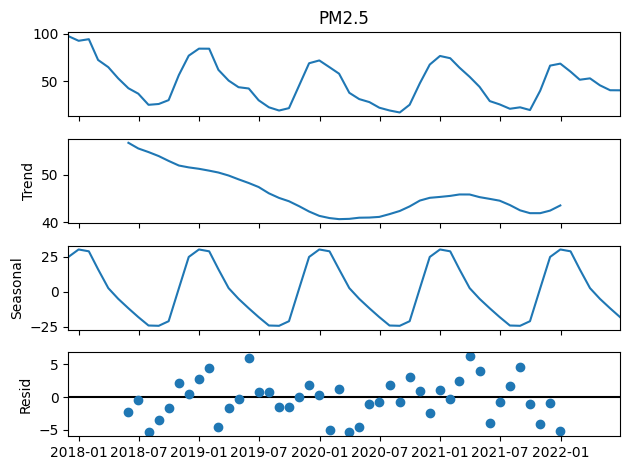

In [29]:
seasonal_analysis_month = seasonal_decompose(df_month['PM2.5'], model = 'additive', period = 12)
seasonal_analysis_month.plot()
plt.show()

___Inferences:___
 - Though the overall graph did not show a very obvious trend, but there seems to be a downward trend in the PM2.5 values.
 - The year with best air quality is 2020 as is very evident from the trend but it seems to started increasing again in 2021.
 - There most obvious explanation for this is the lockdown imposed during 2020, when all industrial activities and traffic had come to a standstill.
 - This has shown a major impact on the wellness of the air quality. 

### Analyzing COVID-19 Impact

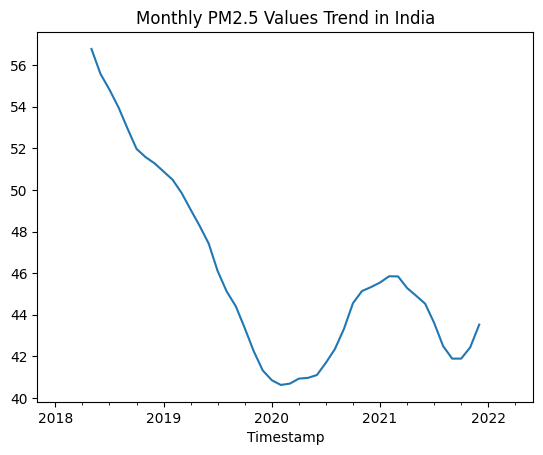

In [67]:
seasonal_analysis_month.trend.plot(title = 'Monthly PM2.5 Values Trend in India')
plt.show()

In [70]:
years = []
for i in range(5):
    year = 2018+i
    years += [df_month[str(year):str(year)]['PM2.5'].mean()]

In [74]:
years

[55.23293204120116,
 46.90408242446688,
 41.30000118394747,
 44.197129662735314,
 48.56362949078622]

In [78]:
(years[0] - years[2])/years[0]

0.2522576720508044

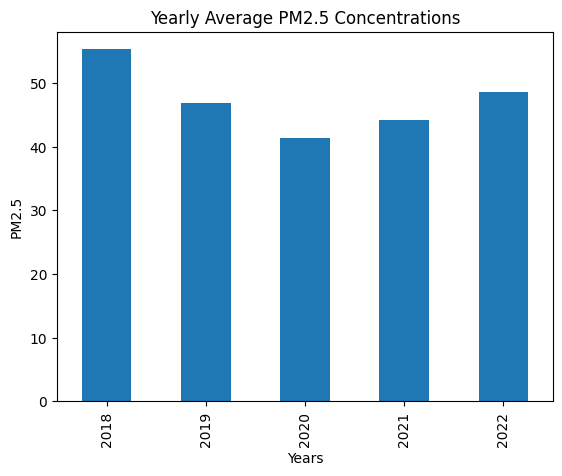

In [77]:
yearly = pd.DataFrame({'Years':[2018,2019,2020,2021,2022],
                      'PM2.5':years})
yearly.set_index('Years', inplace = True)
yearly['PM2.5'].plot.bar(title = 'Yearly Average PM2.5 Concentrations')
plt.xlabel('Years')
plt.ylabel('PM2.5')
plt.show()

### Sample Model Development for Testing

In [39]:
from pmdarima import auto_arima

 - Since we saw that the data was seasonal, we will be using a SARIMA model that will take the seasonality into consideration while predictive future values.
 - Monthly data is useful for yearly forecasts.
 - **These forecasts enable policymakers to implement targeted strategies to reduce greenhouse gas emissions, which contribute to climate change.**
 - **Not to mention, they enable authorities to issue timely warnings and take proactive measures to reduce emissions, thereby improving air quality and protecting public health.**
 - We will be first developing a model to predict monthly average PM2.5 values for the next year from the training data using the previous data.

**Splitting Data into Training and Testing Sets**

In [33]:
test_months = 12
train = df_month[:-test_months]
train.head()

,PM2.5
Timestamp,
2017-11-30,97.343549
2017-12-31,92.470023
2018-01-31,94.150763
2018-02-28,72.335703
2018-03-31,64.767914


In [34]:
test = df_month[-test_months:]
test

,PM2.5
Timestamp,
2021-07-31,21.072487
2021-08-31,22.594443
2021-09-30,19.713108
2021-10-31,40.078259
2021-11-30,66.393317
2021-12-31,68.486343
2022-01-31,60.053805
2022-02-28,51.571816
2022-03-31,53.019113


**Fitting the Model**

In [35]:
sarima_model_month = auto_arima(train['PM2.5'], seasonal = True, m = 6, D = 1)
print(sarima_model_month.summary())

                                       SARIMAX Results                                        
Dep. Variable:                                      y   No. Observations:                   44
Model:             SARIMAX(1, 0, 0)x(1, 1, [1, 2], 6)   Log Likelihood                -127.416
Date:                                Sat, 13 Jul 2024   AIC                            266.833
Time:                                        14:40:43   BIC                            276.658
Sample:                                    11-30-2017   HQIC                           270.329
                                         - 06-30-2021                                         
Covariance Type:                                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.0837      0.843     -1.285      0.199      -2.737       0.569
ar.

**Predicting Values**

In [36]:
test_predictions = sarima_model_month.predict(n_periods = test_months)
test_predictions

2021-07-31    18.810278
2021-08-31    13.642449
2021-09-30    17.972806
2021-10-31    40.974466
2021-11-30    62.889713
2021-12-31    66.319477
2022-01-31    62.761150
2022-02-28    50.663204
2022-03-31    38.500265
2022-04-30    30.728139
2022-05-31    22.626759
2022-06-30    16.289277
Freq: ME, dtype: float64

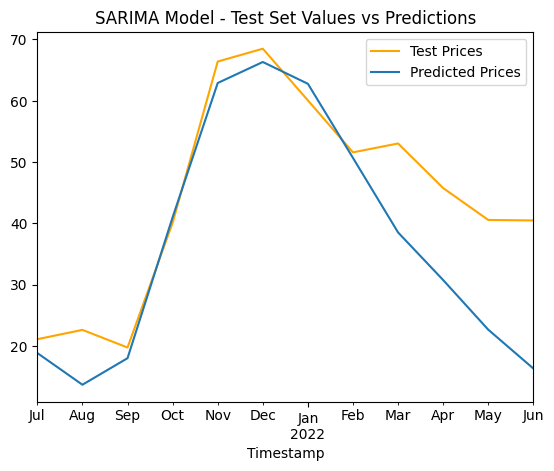

In [120]:
test['PM2.5'].plot(title = 'SARIMA Model - Test Set Values vs Predictions', color = 'orange', label = 'Test Prices')
test_predictions.plot(label = 'Predicted Prices')
plt.legend()
plt.show()

___Points to note:___
 - We can see that the model predicts the values quite well.
 - The only difference can be seen is that the **actual values are much higher than the predicted values between March 2022 and June 2022**.
 - This difference can be seen as the **result of external conditions** that have not been considered in the model.
 - In this case, this parity can be attributed to the **complete uplifting of the lockdown in March 2022**.
 - This meant that **all industrial activities and vehicles** were free to **operate at their full capacity from March 2022**.
 - This **resulted in an unexpected hike in the PM2.5 values**, which cannot be factored into the model.

**Model Evaluation**

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

**Performance for before Upliftment of Lockdown**

In [39]:
print(f"Root Mean Squared Error (RMSE): {mean_squared_error(test['PM2.5'][:-4], test_predictions[:-4], squared = False)}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(test['PM2.5'][:-4], test_predictions[:-4])}")

Root Mean Squared Error (RMSE): 3.778449852101704
Mean Absolute Error (MAE): 2.8921425909325365


**Overall Performance of Model**

In [40]:
print(f"Root Mean Squared Error (RMSE): {mean_squared_error(test['PM2.5'], test_predictions, squared = False)}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(test['PM2.5'], test_predictions)}")

Root Mean Squared Error (RMSE): 11.01259947405207
Mean Absolute Error (MAE): 7.895738010124759


___Inferences:___
 - As can be seen from the evaluation that the model performs much better for period before the upliftment of lockdown.

**Performance for after Upliftment of Lockdown**

In [107]:
test_diff = test - pd.DataFrame(test_predictions).rename(columns = {0:'PM2.5'})
test_diff

,PM2.5
Timestamp,
2021-07-31,2.262209
2021-08-31,8.951994
2021-09-30,1.740301
2021-10-31,-0.896208
2021-11-30,3.503604
2021-12-31,2.166867
2022-01-31,-2.707346
2022-02-28,0.908612
2022-03-31,14.518848


In [109]:
# Post-Lockdown PM2.5 Values
test_diff[-4:]

,PM2.5
Timestamp,
2022-03-31,14.518848
2022-04-30,15.013643
2022-05-31,17.910898
2022-06-30,24.168327


In [119]:
increase_per_month = (test_diff-test_diff.shift()).dropna()
increase_per_month

,PM2.5
Timestamp,
2021-08-31,6.689785
2021-09-30,-7.211692
2021-10-31,-2.636509
2021-11-30,4.399812
2021-12-31,-1.336738
2022-01-31,-4.874212
2022-02-28,3.615958
2022-03-31,13.610235
2022-04-30,0.494795


___Inferences:___
 - It can be seen that the **difference between the predicted and actual values** for after upliftment of lockdown seems to be **increasing at an exponential rate**.
 - Thus, we will adapt by using a **Triple Exponential Smoothing Model** to also consider the trend and seasonality of the data, as well as, adapt to the sudden increase in PM2.5 values.

#### Using Holt-Winters Model
 - The SARIMA model could not take into account the unexpected increase in PM2.5 values due to the upliftment of the lockdown.
 - Hence we will use a Holt-Winters Model, a.k.a Triple Exponential Smoothing Model, that will take into consideration the unexpected increase when forecasting the values.
 - We will first fit a sample model for the test data set predictions.

In [41]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

**Fitting the Model**

In [42]:
fitted_model = ExponentialSmoothing(train['PM2.5'],trend='add',seasonal='add',seasonal_periods=12).fit()
test_predictions_2 = fitted_model.forecast(12)

In [43]:
test_predictions_2

2021-07-31    18.138113
2021-08-31    16.586665
2021-09-30    21.486201
2021-10-31    45.760413
2021-11-30    67.921676
2021-12-31    71.542945
2022-01-31    69.576250
2022-02-28    54.397821
2022-03-31    42.253010
2022-04-30    33.304753
2022-05-31    25.826356
2022-06-30    18.973325
Freq: ME, dtype: float64

**Plotting the Predictions against Test Values**

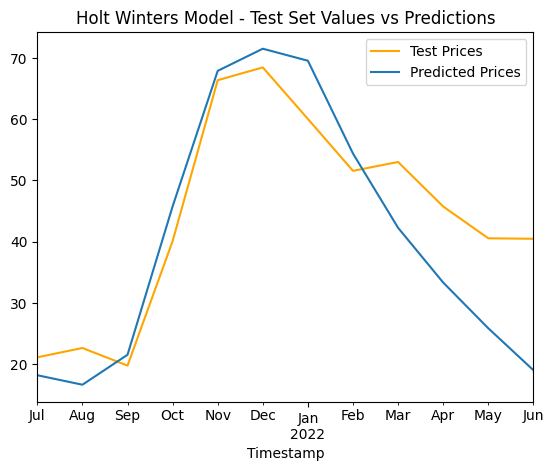

In [121]:
test['PM2.5'].plot(title = 'Holt Winters Model - Test Set Values vs Predictions', color = 'orange', label = 'Test Prices')
test_predictions_2.plot(label = 'Predicted Prices')
plt.legend()
plt.show()

**Model Evaluation**

In [45]:
print(f"Root Mean Squared Error (RMSE): {mean_squared_error(test['PM2.5'], test_predictions_2, squared = False)}")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(test['PM2.5'], test_predictions_2)}")

Root Mean Squared Error (RMSE): 9.74278344731466
Mean Absolute Error (MAE): 7.7274601513233705


___Inferences:___
 - This model shows **higher accuracy** than that of the SARIMA Model.
 - **SARIMA will not be able to take the sudden increase at the end of the dataset into considerations while predicting future values**.
 - Hence, in this scenario, it is **better to use a Holt-Winters' Model for forecasting**.
 - We will check this hypothesis in our final sections.

## Forecasting 1 Year PM2.5 Values

### (A) SARIMA Model

**Fitting the Model**

In [46]:
sarima_future_model = auto_arima(df_month['PM2.5'], seasonal = True, m = 6, D = 1)
print(sarima_future_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   56
Model:             SARIMAX(1, 0, 0)x(1, 1, [1], 6)   Log Likelihood                -165.793
Date:                             Sat, 13 Jul 2024   AIC                            339.586
Time:                                     14:43:26   BIC                            347.234
Sample:                                 11-30-2017   HQIC                           342.498
                                      - 06-30-2022                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9208      0.074     12.399      0.000       0.775       1.066
ar.S.L6       -0.9107      

**Predicting Values**

In [48]:
forecast = sarima_future_model.predict(n_periods = test_months)
forecast

2022-07-31    37.681521
2022-08-31    36.155129
2022-09-30    28.835107
2022-10-31    46.699173
2022-11-30    65.896511
2022-12-31    66.623643
2023-01-31    58.645708
2023-02-28    50.738423
2023-03-31    51.359296
2023-04-30    46.288666
2023-05-31    43.228269
2023-06-30    43.186707
Freq: ME, dtype: float64

In [49]:
df_forecasted = pd.concat([df_month, pd.DataFrame(forecast).rename(columns = {0:'PM2.5'})])

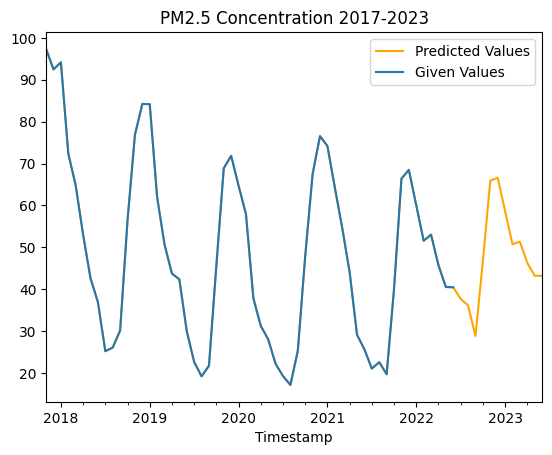

In [50]:
df_forecasted['PM2.5'].plot(title = 'PM2.5 Concentration 2017-2023', color = 'orange', label = 'Predicted Values')
df_month['PM2.5'].plot(label = 'Given Values')
plt.legend()
plt.show()

___Points to note:___
 - The predicted values are decreasing slightly than the previous year which by our understanding of the situation is incorrect.
 - Since the lockdown has been completely lifted in 2022, it is inevitable that the PM2.5 values would only increase in the year 2023.
 - Thus, as expected, the SARIMA model does not take into account the sudden increase at the end of the dataset and bases the prediction on the past values.
 - We will compare this to the Holt-Winter Predictions in the final section.

### (B) Holt-Winters Model

**Fitting the Model**

In [51]:
forecast_model = ExponentialSmoothing(df_month['PM2.5'],trend='add',seasonal='add',seasonal_periods=12).fit()
forecast_2 = forecast_model.forecast(12)

In [52]:
forecast_2

2022-07-31    32.096911
2022-08-31    31.313968
2022-09-30    34.268550
2022-10-31    57.565565
2022-11-30    80.373305
2022-12-31    83.688825
2023-01-31    80.428810
2023-02-28    66.589628
2023-03-31    57.163260
2023-04-30    48.549227
2023-05-31    41.525705
2023-06-30    36.027658
Freq: ME, dtype: float64

In [53]:
df_holt_forecast = pd.concat([df_month, pd.DataFrame(forecast_2).rename(columns = {0:'PM2.5'})])

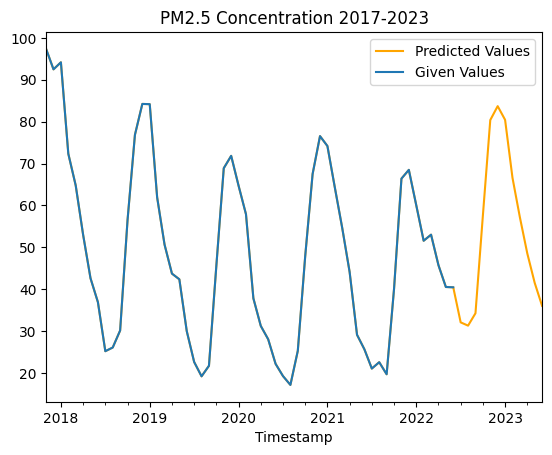

In [54]:
df_holt_forecast['PM2.5'].plot(title = 'PM2.5 Concentration 2017-2023', color = 'orange', label = 'Predicted Values')
df_month['PM2.5'].plot(label = 'Given Values')
plt.legend()
plt.show()

___Points to Note:___
 - As expected again, the Holt-Winters Model successfully took the sudden increase due to upliftment of lockdown into account.
 - Based on this increase, it has adjusted the forecast values accordingly for the next year. 

# <span style="color:red">Conclusion: Unveiling the Silver Lining of COVID-19 on PM2.5 Concentrations and Climate Change</span>
===============================================================================================================

**Plot for Forecasted Values**

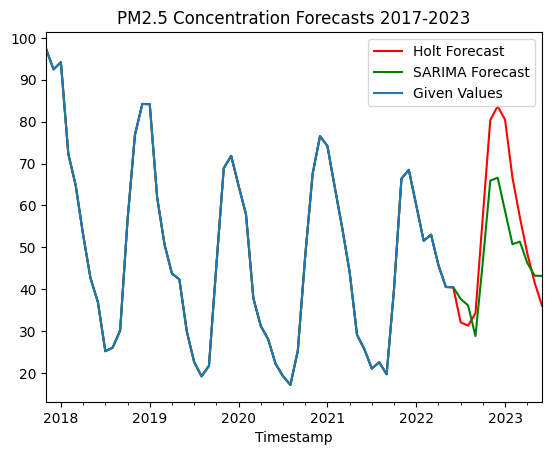

In [87]:
df_holt_forecast['PM2.5'].plot(title = 'PM2.5 Concentration Forecasts 2017-2023', color = 'red', label = 'Holt Forecast')
df_forecasted['PM2.5'].plot(color = 'green', label = 'SARIMA Forecast')
df_month['PM2.5'].plot(label = 'Given Values')
plt.legend()
plt.show()

### <span style="color:blue">Key Takeaways</span>

* **COVID-19's Impact on PM2.5 Concentrations**: Our analysis revealed a significant decrease in PM2.5 concentrations in India during the COVID-19 pandemic, highlighting the influence of human activities on the environment.
* **A Glimpse into a Sustainable Future**: The temporary reduction in emissions serves as a proof-of-concept, demonstrating that drastic changes in human behavior can have a tangible impact on mitigating climate change.
* **Lessons for Climate Change Mitigation**: The COVID-19 pandemic has inadvertently provided a unique opportunity to reassess our priorities and strive for a more environmentally conscious future.
* **Collective Action for a Sustainable Future**: By learning from this experience, we can work towards creating a better, more sustainable world for generations to come.

### <span style="color:blue">Implications for Climate Change</span>

* **Reduced Emissions, Improved Air Quality**: The decrease in PM2.5 concentrations during the pandemic underscores the importance of sustained efforts to reduce greenhouse gas emissions and transition towards a more sustainable future.
* **A Call to Action**: The COVID-19 pandemic has shown that collective action can lead to significant improvements in air quality and, by extension, climate mitigation.
* **Reassessing Priorities**: The pandemic has provided a rare opportunity to reassess our priorities and strive for a more environmentally conscious future.

### <span style="color:blue">Our Contribution: Leveraging Machine Learning for Climate Change Mitigation</span>

* **Machine Learning for Climate Change**: Our research demonstrates the potential of machine learning algorithms in analyzing and predicting PM2.5 concentrations, enabling more effective climate change mitigation strategies.
* **Predictive Modeling**: By developing predictive models that incorporate machine learning techniques, we can better understand the complex relationships between human activities, environmental factors, and climate change.
* **Data-Driven Decision Making**: Machine learning can facilitate data-driven decision making, enabling policymakers and stakeholders to make informed decisions about climate change mitigation and adaptation strategies.

### <span style="color:blue">Future Directions</span>

* **Sustained Efforts for Climate Change Mitigation**: Our analysis highlights the need for sustained efforts to reduce emissions and transition towards a more sustainable future.
* **Learning from the Pandemic**: By learning from the COVID-19 pandemic, we can work towards creating a better, more sustainable world for generations to come.
* **Machine Learning for Climate Resilience**: The integration of machine learning into climate change research and policy can enhance our ability to adapt to and mitigate the impacts of climate change.

### <span style="color:blue">The Role of Machine Learning in Addressing Climate Change</span>

* **Climate Modeling and Prediction**: Machine learning can improve climate modeling and prediction, enabling more accurate forecasts and better decision making.
* **Renewable Energy Optimization**: Machine learning can optimize renewable energy systems, increasing their efficiency and reducing greenhouse gas emissions.
* **Sustainable Resource Management**: Machine learning can facilitate sustainable resource management, reducing waste and promoting more efficient use of resources.
* **Climate Change Adaptation**: Machine learning can support climate change adaptation efforts, enabling communities to better prepare for and respond to climate-related disasters.